<a href="https://colab.research.google.com/github/leehanchung/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"

In [0]:
header = ['age', 'op_yr', 'nodes', 'survive']
df = pd.read_csv(url, names=header)

In [0]:
print('All rows loaded? {}\n\n'.format(df.shape[0]==306))
print('***Check missing values*** \n{}\n\n'.format(df.isnull().any()))

All rows loaded? True


***Check missing values*** 
age        False
op_yr      False
nodes      False
survive    False
dtype: bool




In [0]:
df.survive = df.survive.apply(lambda x: 0 if x == 2 else x)
print('survive category encodings is now {}.\n\n'.format(df.survive.unique()))
print('***Top 5 rows***\n{}\n'.format(df.head()))

survive category encodings is now [1 0].


***Top 5 rows***
   age  op_yr  nodes  survive
0   30     64      1        1
1   30     62      3        1
2   30     65      0        1
3   31     59      2        1
4   31     65      4        1



## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
print('***Summary statistics*** \n{}\n'.format(df.describe()))

***Summary statistics*** 
              age       op_yr       nodes     survive
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    0.735294
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    0.000000
25%     44.000000   60.000000    0.000000    0.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    1.000000
max     83.000000   69.000000   52.000000    1.000000



In [0]:
print('Binned age vs. survive\n{}\n\n'.format(pd.crosstab(pd.cut(df.age, bins=5), df.survive)))
print('binned notes vs survive\n{}\n\n'.format(pd.crosstab(pd.cut(df.nodes, bins=5), df.survive)))
print('binned age vs nodes stats\n{}'.format(df.groupby(pd.cut(df.age, bins=5))['nodes'].agg(['mean', 'std'])))

Binned age vs. survive
survive          0   1
age                   
(29.947, 40.6]   4  39
(40.6, 51.2]    31  68
(51.2, 61.8]    27  69
(61.8, 72.4]    16  43
(72.4, 83.0]     3   6


binned notes vs survive
survive          0    1
nodes                  
(-0.052, 10.4]  58  208
(10.4, 20.8]    15   11
(20.8, 31.2]     6    5
(31.2, 41.6]     1    0
(41.6, 52.0]     1    1


binned age vs nodes stats
                    mean       std
age                               
(29.947, 40.6]  3.813953  6.348062
(40.6, 51.2]    4.181818  7.409816
(51.2, 61.8]    4.604167  7.957094
(61.8, 72.4]    3.423729  6.605127
(72.4, 83.0]    1.111111  1.269296


In [0]:
pd.pivot_table(df, values='survive', index=pd.cut(df.nodes, bins=10), columns=pd.cut(df.age, bins=5), aggfunc=np.mean)

age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
nodes,,,,,
"(-0.052, 5.2]",0.939394,0.770270,0.797297,0.804348,0.666667
"(5.2, 10.4]",0.800000,0.545455,0.555556,0.600000,NaN
"(10.4, 15.6]",1.000000,0.428571,0.000000,0.250000,NaN
"(15.6, 20.8]",NaN,0.500000,0.666667,0.000000,NaN
"(20.8, 26.0]",0.000000,0.000000,0.500000,0.500000,NaN
"(26.0, 31.2]",1.000000,NaN,NaN,1.000000,NaN
"(31.2, 36.4]",NaN,NaN,0.000000,NaN,NaN
"(41.6, 46.8]",NaN,NaN,1.000000,NaN,NaN
"(46.8, 52.0]",NaN,0.000000,NaN,NaN,NaN


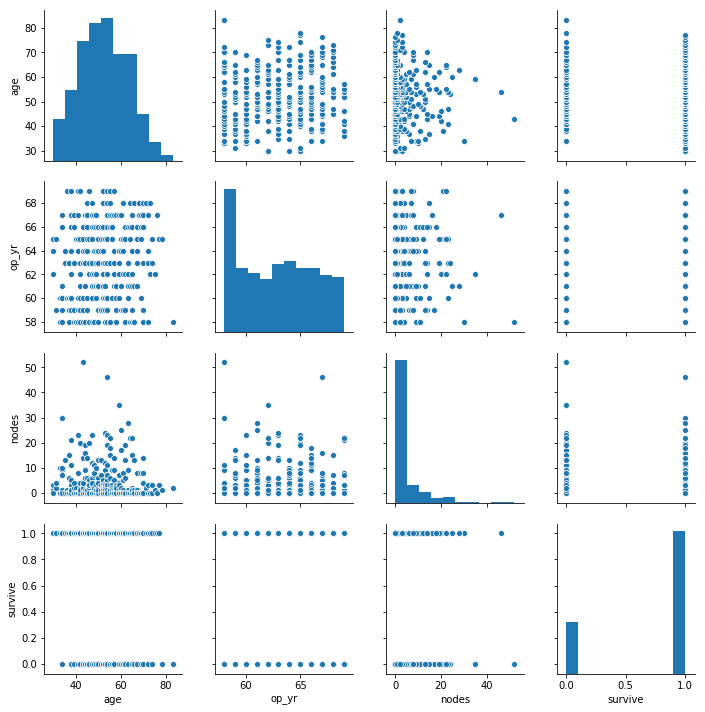

In [0]:
sns.pairplot(df);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.



Nodes seem to have a positive relationship with survival with the more cases of survival clustered round higher node counts. 

Age has a negative relationship with survival as the chances of survival decreases as age gets higher.

Number of nodes and age seems to follow a normal distribution with more cases of nodes and higher number of nodes clustering around ~50 years of age and taper off towards both sides of the age curve.